In [1]:
# import relevant python Libraries
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import seaborn as sns
import matplotlib.pyplot as plt

# Objective

We assumed we want ot make analysis to buy a car within our budget, So we explored the data to get the missing values then cleaning it , and did our analysis 

Loading data and Exploring

In [2]:
# read data
df = pd.read_csv('c:/Users/hp/Downloads/Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
# data info
df.shape

(205, 26)

In [4]:
# data sample
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
def get_uniue_val (datafr): 

    datafr =datafr.select_dtypes(exclude=['float','int64'])
    column_list =  datafr
    
    df_final =pd.DataFrame()
    for i in column_list :
        arr=np.array(datafr[i].unique())
        df_new =pd.DataFrame()
        for ar in arr :
            xx= [{i:ar}]

            df_new=df_new.append(xx, ignore_index=True)
       # print(df_new)   
        df_final= pd.concat([df_final,df_new],  axis=1)
    df_final=df_final.fillna( '--', )        
    return df_final

In [6]:
get_uniue_val(df)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,164,audi,diesel,turbo,four,hatchback,fwd,rear,ohcv,six,2bbl,2.68,3.47,154,5500,16500
2,158,bmw,--,--,?,sedan,4wd,--,ohc,five,mfi,3.19,3.4,102,5800,13950
3,192,chevrolet,--,--,--,wagon,--,--,l,three,1bbl,3.13,2.8,115,4250,17450
4,188,dodge,--,--,--,hardtop,--,--,rotor,twelve,spfi,3.5,3.19,110,5400,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,16845
183,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,19045
184,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,21485
185,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,22470


In [7]:
#Looping data to show each columns contents
I=df.columns
for _ in I:
    print("[",_,"]" ,"\n","-"*30)
    print(df[_].value_counts())
    print(_,"\n","-"*30)

[ symboling ] 
 ------------------------------
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
symboling 
 ------------------------------
[ normalized-losses ] 
 ------------------------------
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64
normalized-losses 
 ------------------------------
[ make ] 
 ------------------------------
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12


In [8]:
# data strings Vs integers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
# replace all "?" in all column by not a number to facilitate its identification later
df = df.replace('?',np.NAN) 

In [10]:
# summary of null values in each column
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
# since addressed columns are Quantitative, fill data missing values  by mean of each column
cols = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm','price']
for col in cols:
     df[col]=pd.to_numeric(df[col])
     df[col].fillna(df[col].mean(), inplace=True)


In [12]:
# check data info after filling the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [13]:
#calculate mean, min, max, std
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
# calculate Mode and Median
print(df.median())
print("\n\n","[",'Mode',"]" ,"\n\n","-"*30)
print(df.mode())

symboling                1.00
normalized-losses      122.00
wheel-base              97.00
length                 173.20
width                   65.50
height                  54.10
curb-weight           2414.00
engine-size            120.00
bore                     3.31
stroke                   3.29
compression-ratio        9.00
horsepower              95.00
peak-rpm              5200.00
city-mpg                24.00
highway-mpg             30.00
price                10595.00
dtype: float64


 [ Mode ] 

 ------------------------------
   symboling  normalized-losses    make fuel-type aspiration num-of-doors  \
0        0.0              122.0  toyota       gas        std         four   
1        NaN                NaN     NaN       NaN        NaN          NaN   

  body-style drive-wheels engine-location  wheel-base  length  width  height  \
0      sedan          fwd           front        94.5   157.3   63.8    50.8   
1        NaN          NaN             NaN         NaN     NaN    Na

C:\Users\hp\AppData\Local\Temp/ipykernel_14380/3322351164.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.median())


<AxesSubplot:>

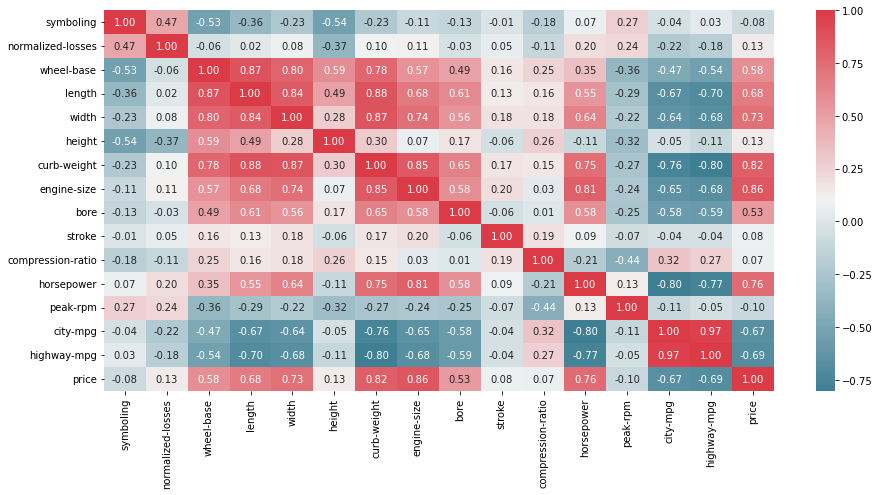

In [15]:
# draw the correlation matrix to understand the correlation between variables.
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(15,7))  
col_map = sns.diverging_palette(220 , 10 , as_cmap=True)
sns.heatmap(df_corr , cmap=col_map ,annot= True, fmt=".2f")

**1-The price with Positve corrlation with (engine size,curb-weight,horsepower) \
2-The price with Negative corrlation with (city-mpg,highway-mpg)**

Categorize the price to main 3 categories

In [16]:
bind = int((max(df['price'])-min(df['price']))/3)
bins = range(int(min(df['price'])),int(max(df['price'])),bind)
df['price_bin'] = pd.cut(df['price'],bins,labels=['Low','Med','High'])
df.groupby('price_bin')['make'].count()

price_bin
Low     174
Med      18
High     11
Name: make, dtype: int64

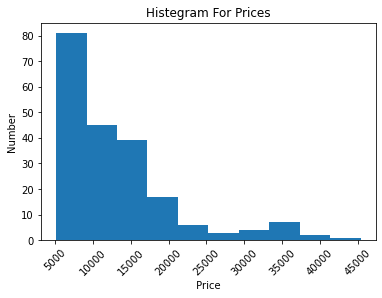

In [17]:
plt.hist(df['price'])
plt.title('Histegram For Prices')
plt.xticks(rotation = 45 , horizontalalignment="center")
plt.xlabel(' Price ')
plt.ylabel('Number');

**Right Skweed most of car in the price interval(5000,15000)**

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


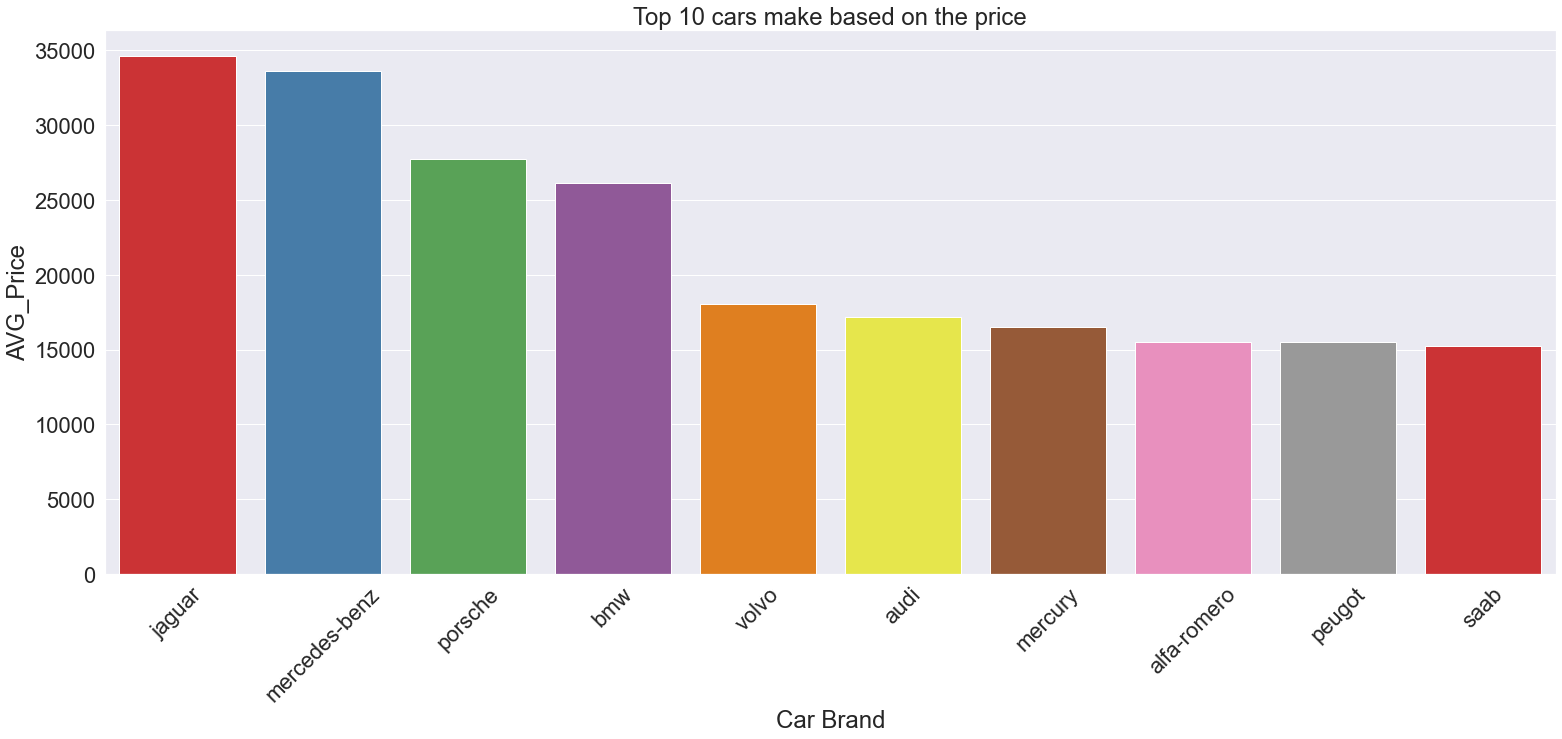

In [18]:
# Rank 10 highest car brands according to their average price
df1=df.groupby('make')['price'].agg('mean')
df1=pd.DataFrame(df1)
df1.reset_index(inplace=True)
data_types_car=df1.sort_values(by='price',ascending=False)
x_axis=data_types_car['make'][0:10]
y_axis=data_types_car['price'][0:10]
# Visualization settings
sns.set(rc={'figure.figsize':(26,10)}, font_scale=2)
ax = sns.barplot(x_axis, y_axis, palette="Set1")
ax.set(xlabel='Car Brand', ylabel='AVG_Price', title = 'Top 10 cars make based on the price')
for item in ax.get_xticklabels():
    item.set_rotation(45)

<AxesSubplot:xlabel='fuel-type'>

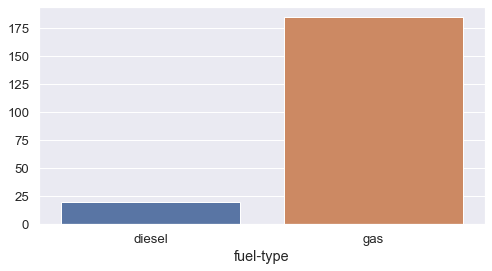

In [19]:
# compare cars according to their fuel type
df2=df.groupby(['fuel-type']).size()#.plot(kind = "bar")
sns.set(rc={'figure.figsize':(8,4)}, font_scale=1.2)
sns.barplot(x = df2.index, y = df2.values)


<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

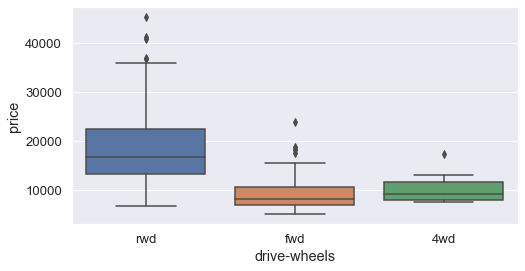

In [20]:
# if I have 10000$ which type of cars(drive-wheels) is suitable to my budget?
sns.boxplot(x='drive-wheels' , y='price' , data=df)

<AxesSubplot:xlabel='body-style', ylabel='drive-wheels'>

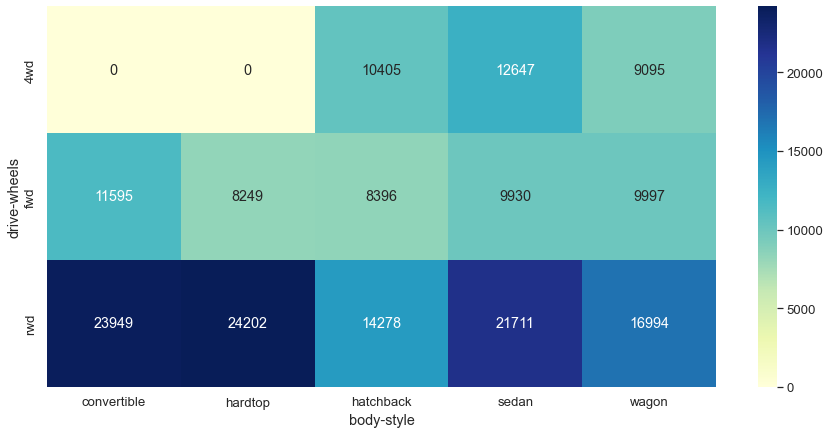

In [21]:
# representation of cars types (body vs drive wheels) and table contains the average price for user selection
# this represenation give the opportunity to reader to compare his 
# budget with the average price and the selected criteria
df_for_piv = df[['drive-wheels' , 'make' , 'price' , 'body-style']]
pivt_4 = df_for_piv.pivot_table(index= ['drive-wheels'], columns=['body-style'] ,values='price', aggfunc='mean', fill_value=0,sort=True).astype(int)
fig, ax = plt.subplots(figsize=(15,7))  
sns.heatmap(pivt_4 ,ax=ax , cmap="YlGnBu" , annot=True , fmt=".0f")

<AxesSubplot:xlabel='make', ylabel='price_bin'>

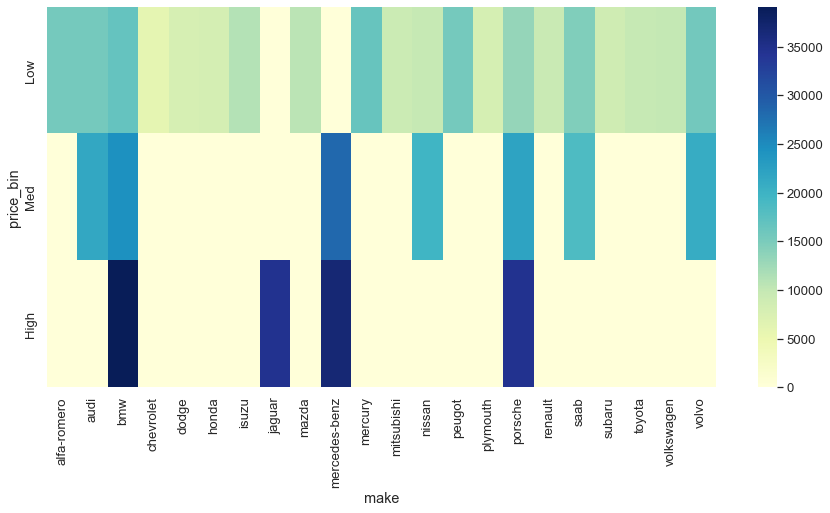

In [22]:
df_for_piv4 = df[['price_bin' , 'make' , 'price' ]]
pivt_4 = df_for_piv4.pivot_table(index= ['price_bin'], columns=['make'] ,values='price', aggfunc='mean', fill_value=0,sort=True).astype(int)
fig, ax = plt.subplots(figsize=(15,7))  
sns.heatmap(pivt_4 ,ax=ax , cmap="YlGnBu" , fmt=".0f")

In [ ]:
#test